<a href="https://colab.research.google.com/github/Soumi7/TFNotebooks/blob/master/Soumi_UCF101_specific_folder_download_ucf_dowaloaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import random
import os
import ssl
import cv2
import numpy as np
import imageio
from IPython import display
from urllib import request
import re
import tempfile

In [2]:
UCF_ROOT = "https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/"
_VIDEO_LIST = None
Videos ={}
_CACHE_DIR = tempfile.mkdtemp()
# default Colab environment anymore.
unverified_context = ssl._create_unverified_context()
def list_ucf_videos():
  global _VIDEO_LIST
  if not _VIDEO_LIST:
    index = request.urlopen(UCF_ROOT, context=unverified_context).read().decode("utf-8")
    v = ['HandstandPushups','HandstandWalking','PullUps','Punch','PushUps']
    for i in v:
      s = "(v_"+str(i)+"[\w_]+\.avi)"
      videos = re.findall(s, index)
      Videos[i]=sorted(set(videos))
  return Videos

In [3]:
V={}
V = list_ucf_videos()
for key,value in V.items():
  print(key,value)

HandstandPushups ['v_HandstandPushups_g01_c01.avi', 'v_HandstandPushups_g01_c02.avi', 'v_HandstandPushups_g01_c03.avi', 'v_HandstandPushups_g01_c04.avi', 'v_HandstandPushups_g02_c01.avi', 'v_HandstandPushups_g02_c02.avi', 'v_HandstandPushups_g02_c03.avi', 'v_HandstandPushups_g02_c04.avi', 'v_HandstandPushups_g03_c01.avi', 'v_HandstandPushups_g03_c02.avi', 'v_HandstandPushups_g03_c03.avi', 'v_HandstandPushups_g03_c04.avi', 'v_HandstandPushups_g04_c01.avi', 'v_HandstandPushups_g04_c02.avi', 'v_HandstandPushups_g04_c03.avi', 'v_HandstandPushups_g04_c04.avi', 'v_HandstandPushups_g05_c01.avi', 'v_HandstandPushups_g05_c02.avi', 'v_HandstandPushups_g05_c03.avi', 'v_HandstandPushups_g05_c04.avi', 'v_HandstandPushups_g06_c01.avi', 'v_HandstandPushups_g06_c02.avi', 'v_HandstandPushups_g06_c03.avi', 'v_HandstandPushups_g06_c04.avi', 'v_HandstandPushups_g07_c01.avi', 'v_HandstandPushups_g07_c02.avi', 'v_HandstandPushups_g07_c03.avi', 'v_HandstandPushups_g07_c04.avi', 'v_HandstandPushups_g08_c01.av

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
unverified_context = ssl._create_unverified_context()
def fetch_ucf_video(video):
  cache_path = os.path.join(_CACHE_DIR, video)
  if not os.path.exists(cache_path):
    urlpath = request.urljoin(UCF_ROOT, video)
    print("Fetching %s => %s" % (urlpath, cache_path))
    data = request.urlopen(urlpath, context=unverified_context).read()
    open(cache_path, "wb").write(data)
  return cache_path

In [7]:
UCF_ROOT = "https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/"

V={}
V = list_ucf_videos()
for i,value in V.items():
  _VIDEO_LIST = V[i]
  _CACHE_DIR = "/content/drive/My Drive/ucf/" + str(i) + "/"
  for j in _VIDEO_LIST:  
    video_path = fetch_ucf_video(j)

Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g01_c01.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g01_c01.avi
Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g01_c02.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g01_c02.avi
Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g01_c03.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g01_c03.avi
Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g01_c04.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g01_c04.avi
Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g02_c01.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g02_c01.avi
Fetching https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_HandstandPushups_g02_c02.avi => /content/drive/My Drive/ucf/HandstandPushups/v_HandstandPushups_g02_c02.av

In [1]:
!pip install -q tf-models-nightly tfds-nightly

!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy

     |████████████████████████████████| 1.7MB 32.8MB/s 
     |████████████████████████████████| 3.9MB 45.0MB/s 
     |████████████████████████████████| 38.2MB 80kB/s 
     |████████████████████████████████| 448.8MB 37kB/s 
     |████████████████████████████████| 686kB 49.5MB/s 
     |████████████████████████████████| 1.2MB 43.6MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 4.3MB 31.4MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 645kB 51.9MB/s 
     |████████████████████████████████| 174kB 60.1MB/s 
     |████████████████████████████████| 358kB 59.4MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 5.9MB 41.0MB/s 
     |████████████████████████████████| 471kB 44.9MB/s 
     |████████████████████████████████| 4.0MB 41.1MB/s 
     |████████████████████████████████| 4.2MB 45.0MB/s

In [2]:
!pip3 install tensorflow

     |████████████████████████████████| 2.9MB 23.1MB/s 
     |████████████████████████████████| 3.8MB 39.0MB/s 
ERROR: tf-nightly 2.6.0.dev20210525 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tf-nightly 2.6.0.dev20210525 has requirement grpcio<2.0,>=1.37.0, but you'll have grpcio 1.32.0 which is incompatible.
ERROR: tf-nightly 2.6.0.dev20210525 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: grpcio 1.38.0
    Uninstalling grpcio-1.38.0:
      Successfully uninstalled grpcio-1.38.0


In [3]:
!pip3 install tensorflow_datasets

In [4]:
import os
from six.moves import urllib

import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

from official.vision.beta.configs import video_classification
from official.vision.beta.projects.movinet.configs import movinet as movinet_configs
from official.vision.beta.projects.movinet.modeling import movinet
from official.vision.beta.projects.movinet.modeling import movinet_layers
from official.vision.beta.projects.movinet.modeling import movinet_model

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:43: UserWarning: You are currently using a nightly version of TensorFlow (2.6.0-dev20210525). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


In [5]:
movinet_a2_hub_url = 'https://tfhub.dev/tensorflow/movinet/a2/base/kinetics-600/classification/1'

inputs = tf.keras.layers.Input(
    shape=[None, None, None, 3],
    dtype=tf.float32)

encoder = hub.KerasLayer(movinet_a2_hub_url, trainable=True)

# Important: To use tf.nn.conv3d on CPU, we must compile with tf.function.
encoder.call = tf.function(encoder.call, experimental_compile=True)

# [batch_size, 600]
outputs = encoder(dict(image=inputs))

model = tf.keras.Model(inputs, outputs)

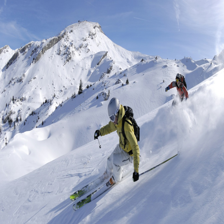

In [6]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/8/84/Ski_Famille_-_Family_Ski_Holidays.jpg'
image_height = 224
image_width = 224

with urllib.request.urlopen(image_url) as f:
  image = Image.open(f).resize((image_height, image_width))
video = tf.reshape(np.array(image), [1, 1, image_height, image_width, 3])
video = tf.cast(video, tf.float32) / 255.

image

In [7]:
output = model(video)
output_label_index = tf.argmax(output, -1)[0].numpy()

print(output_label_index)

465


In [8]:
dataset_name = 'ucf101'

builder = tfds.builder(dataset_name)

config = tfds.download.DownloadConfig(verify_ssl=False)
builder.download_and_prepare(download_config=config)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Dataset ucf101 downloaded and prepared to /root/tensorflow_datasets/ucf101/ucf101_1_256/2.0.0. Subsequent calls will reuse this data.


In [9]:
num_classes = builder.info.features['label'].num_classes
num_examples = {
    name: split.num_examples
    for name, split in builder.info.splits.items()
}

print('Number of classes:', num_classes)
print('Number of examples for train:', num_examples['train'])
print('Number of examples for test:', num_examples['test'])
print()

builder.info
print(num_classes)
print(num_examples)

Number of classes: 101
Number of examples for train: 9537
Number of examples for test: 3783

101
{Split('train'): 9537, Split('test'): 3783}


In [10]:
batch_size = 8
num_frames = 8
frame_stride = 10
resolution = 172

def format_features(features):
  video = features['video']
  video = video[:, ::frame_stride]
  video = video[:, :num_frames]

  video = tf.reshape(video, [-1, video.shape[2], video.shape[3], 3])
  video = tf.image.resize(video, (resolution, resolution))
  video = tf.reshape(video, [-1, num_frames, resolution, resolution, 3])
  video = tf.cast(video, tf.float32) / 255.

  label = tf.one_hot(features['label'], num_classes)
  return (video, label)

train_dataset = builder.as_dataset(
    split='train',
    batch_size=batch_size,
    shuffle_files=True)
train_dataset = train_dataset.map(
    format_features,
    num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.prefetch(2)

test_dataset = builder.as_dataset(
    split='test',
    batch_size=batch_size)
test_dataset = test_dataset.map(
    format_features,
    num_parallel_calls=tf.data.AUTOTUNE,
    deterministic=True)
test_dataset = test_dataset.prefetch(2)

,,,,,,,

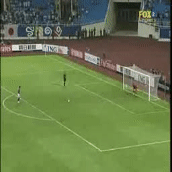
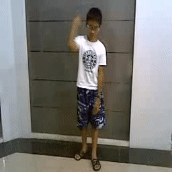
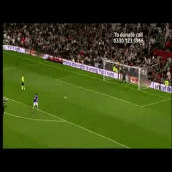
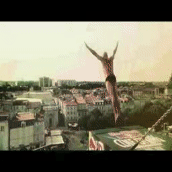
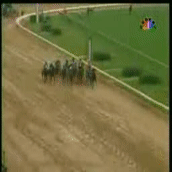
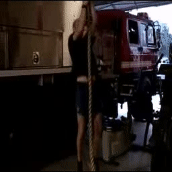
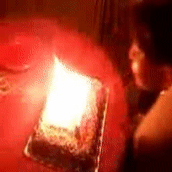
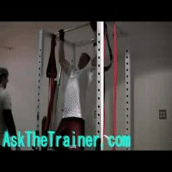

In [11]:
videos, labels = next(iter(train_dataset))
media.show_videos(videos.numpy(), codec='gif', fps=5)

In [12]:
model_id = 'a0'

tf.keras.backend.clear_session()

backbone = movinet.Movinet(
    model_id=model_id)
model = movinet_model.MovinetClassifier(
    backbone=backbone,
    num_classes=600)
model.build([batch_size, num_frames, resolution, resolution, 3])

# Load pretrained weights from TF Hub
movinet_hub_url = f'https://tfhub.dev/tensorflow/movinet/{model_id}/base/kinetics-600/classification/1'
movinet_hub_model = hub.KerasLayer(movinet_hub_url, trainable=True)
pretrained_weights = {w.name: w for w in movinet_hub_model.weights}
model_weights = {w.name: w for w in model.weights}
for name in pretrained_weights:
  model_weights[name].assign(pretrained_weights[name])

# Wrap the backbone with a new classifier to create a new classifier head
# with num_classes outputs
model = movinet_model.MovinetClassifier(
    backbone=backbone,
    num_classes=num_classes)
model.build([batch_size, num_frames, resolution, resolution, 3])

# Freeze all layers except for the final classifier head
for layer in model.layers[:-1]:
  layer.trainable = False
model.layers[-1].trainable = True

In [13]:
num_epochs = 3

train_steps = num_examples['train'] // batch_size
total_train_steps = train_steps * num_epochs
test_steps = num_examples['test'] // batch_size

loss_obj = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True,
    label_smoothing=0.1)

metrics = [
    tf.keras.metrics.TopKCategoricalAccuracy(
        k=1, name='top_1', dtype=tf.float32),
    tf.keras.metrics.TopKCategoricalAccuracy(
        k=5, name='top_5', dtype=tf.float32),
]

initial_learning_rate = 0.01
learning_rate = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps=total_train_steps,
)
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate, rho=0.9, momentum=0.9, epsilon=1.0, clipnorm=1.0)

model.compile(loss=loss_obj, optimizer=optimizer, metrics=metrics)

callbacks = [
    tf.keras.callbacks.TensorBoard(),
]

In [ ]:
results = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=num_epochs,
    steps_per_epoch=train_steps,
    validation_steps=test_steps,
    callbacks=callbacks,
    validation_freq=1,
    verbose=1)

Epoch 1/3
  64/1192 [>.............................] - ETA: 41:41:07 - loss: 4.6073 - top_1: 0.0156 - top_5: 0.0742

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs --port 0

# References

- https://github.com/tensorflow/models/tree/master/official/vision/beta/projects/movinet
- https://tfhub.dev/tensorflow/movinet/a4/base/kinetics-600/classification/1
- https://github.com/tensorflow/models/blob/master/official/vision/beta/projects/movinet/movinet_tutorial.ipynb 


